In [1]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
from sklearn.preprocessing import MinMaxScaler
import seaborn as sns

In [2]:
voice_usage_info = pd.read_csv("data/VOICE_OUTGOING_CALL_USAGE_ONNET.csv")

voice_usage_info.shape



(32169, 12)

In [3]:
voice_usage_info

,event_source,event_source.hash,call_count,duration (seconds),year month,account_num,account_num.hash,rtom_code,location_code,msan,equp_id,equp_index
0,112074655,ba2cd0a629f9bd5acc9d7fcd89971dad,17,6240.0,201912,0033241719,1cca6a8545b413f559cb2150db1e60d4,R-KON,WI-NWT-NODE,MSAG5200-ISL,48520,1
1,332284364,f36049a029726b88e7ccc0ac53cd966c,48,10260.0,202004,0029874823,9cce11d3fb4e2be8a4f836907220e850,R-NTB,PC-AGT-NODE,MSAG5200-ISL,48003,1
2,112074723,d7b523c1eba8e755b5c8a149f6562348,30,6474.0,202005,0033259838,6c9c219e7478591ee675017aba34b105,R-KON,IDH-KGW-NODE,MSAG5200-ISL,619449,1
3,332284364,f36049a029726b88e7ccc0ac53cd966c,37,12060.0,202005,0029874823,9cce11d3fb4e2be8a4f836907220e850,R-NTB,PC-AGT-NODE,MSAG5200-ISL,48003,1
4,332284364,f36049a029726b88e7ccc0ac53cd966c,94,24720.0,202006,0029874823,9cce11d3fb4e2be8a4f836907220e850,R-NTB,PC-AGT-NODE,MSAG5200-ISL,48003,1
...,...,...,...,...,...,...,...,...,...,...,...,...
32164,382247076,8bce192f1a4cf21bcd65958a32f537ed,1,393.0,201911,0030285325,adf3f539cdcfd24b33c8ad83631f825a,R-PH,PH-AKG-NODE,MSAG5200,43163,1
32165,382247139,6d219e6c2e086d6959f4d90cad121009,6,1070.0,202001,0037371559,7aa8c0a144b14c0d37d9b50e420c4773,R-PH,PH-AKG-NODE,MSAG5200,43163,1
32166,382247139,6d219e6c2e086d6959f4d90cad121009,14,1695.0,202002,0037371559,7aa8c0a144b14c0d37d9b50e420c4773,R-PH,PH-AKG-NODE,MSAG5200,43163,1
32167,382247139,6d219e6c2e086d6959f4d90cad121009,4,2340.0,202003,0037371559,7aa8c0a144b14c0d37d9b50e420c4773,R-PH,PH-AKG-NODE,MSAG5200,43163,1


In [4]:
# ToDo 
# Handle null values
# Drop unnecessary cols
# Pivot by monthYear
# Usage rating Upload/Downlad/Duration - bucketizing/ add rating cols
# location grouping/bucketizing (consider 4 location cols)
# User profile dim table
# visualize and analyze data

In [5]:
voice_usage_info = voice_usage_info.drop_duplicates(["event_source","year month"], keep="last")

voice_usage_info.shape

(32140, 12)

In [6]:
voice_usage_info = voice_usage_info.drop(['event_source.hash','account_num.hash'], axis=1)
voice_usage_info.rename(columns={'duration (seconds)': 'duration','year month':'year-month'}, inplace=True)
voice_usage_info

,event_source,call_count,duration,year-month,account_num,rtom_code,location_code,msan,equp_id,equp_index
0,112074655,17,6240.0,201912,0033241719,R-KON,WI-NWT-NODE,MSAG5200-ISL,48520,1
1,332284364,48,10260.0,202004,0029874823,R-NTB,PC-AGT-NODE,MSAG5200-ISL,48003,1
2,112074723,30,6474.0,202005,0033259838,R-KON,IDH-KGW-NODE,MSAG5200-ISL,619449,1
3,332284364,37,12060.0,202005,0029874823,R-NTB,PC-AGT-NODE,MSAG5200-ISL,48003,1
4,332284364,94,24720.0,202006,0029874823,R-NTB,PC-AGT-NODE,MSAG5200-ISL,48003,1
...,...,...,...,...,...,...,...,...,...,...
32164,382247076,1,393.0,201911,0030285325,R-PH,PH-AKG-NODE,MSAG5200,43163,1
32165,382247139,6,1070.0,202001,0037371559,R-PH,PH-AKG-NODE,MSAG5200,43163,1
32166,382247139,14,1695.0,202002,0037371559,R-PH,PH-AKG-NODE,MSAG5200,43163,1
32167,382247139,4,2340.0,202003,0037371559,R-PH,PH-AKG-NODE,MSAG5200,43163,1


In [7]:
voice_usage_info['duration'].fillna(0)
voice_usage_info['call_count'].fillna(0)

0        17
1        48
2        30
3        37
4        94
         ..
32164     1
32165     6
32166    14
32167     4
32168    10
Name: call_count, Length: 32140, dtype: int64

In [8]:
voice_usage_info.isnull().sum(axis=0)

event_source      0
call_count        0
duration         31
year-month        0
account_num       0
rtom_code         0
location_code     0
msan              0
equp_id           0
equp_index        0
dtype: int64

# Phase 1

## Usage Ranking

- 1. Pivot by year-month
- 2. Bin by Upload/Download/Duration
- 3. Usage Rank
- 4. Labling usage

In [9]:
voice_usage = voice_usage_info[['event_source','account_num','call_count','duration','year-month']]
voice_usage


,event_source,account_num,call_count,duration,year-month
0,112074655,0033241719,17,6240.0,201912
1,332284364,0029874823,48,10260.0,202004
2,112074723,0033259838,30,6474.0,202005
3,332284364,0029874823,37,12060.0,202005
4,332284364,0029874823,94,24720.0,202006
...,...,...,...,...,...
32164,382247076,0030285325,1,393.0,201911
32165,382247139,0037371559,6,1070.0,202001
32166,382247139,0037371559,14,1695.0,202002
32167,382247139,0037371559,4,2340.0,202003


In [10]:
pivot_voice_usage_info = pd.pivot_table(voice_usage,index=['event_source'],columns=['year-month'], aggfunc=np.sum, fill_value=0)
pivot_voice_usage_info

call_count                                                   \
year-month       201908 201909 201910 201911 201912 202001 202002 202003   
event_source                                                               
112053582             9      0      1      0      2      4      0      0   
112053623            11      7     22     28     24      8     10     10   
112053643            10      6     14     10      6      9      7     28   
112054356             5      0      0      0      0      0      0      0   
112055452            18     68     42     47     42     49     34     23   
...                 ...    ...    ...    ...    ...    ...    ...    ...   
912286932             0      0      1      0      1      1      0      2   
912286967             1      0      4      1      1      0      0      0   
912286996             2      3      5      2      2      0      1      2   
912287030             3      0      0      0      0      2      1      0   
912287049             2      0      4      1      1      1      3      1   

                            ... duration                                     \
year-month   202004 202005  ...   201911 201912 202001 202002 202003 202004   
event_source                ...                                               
112053582         0      0  ...        0    420    944      0      0      0   
112053623         8      2  ...     5280   4560   1320   1380   1620   3240   
112053643        22     13  ...      968    487   1320    540   2820   1980   
112054356         0      0  ...        0      0      0      0      0      0   
112055452        64     61  ...     3173   3240   4080   2340   1674   4260   
...             ...    ...  ...      ...    ...    ...    ...    ...    ...   
912286932         1      0  ...        0     60    120      0   1380     60   
912286967         0      3  ...      327    354      0      0      0      0   
912286996         3      3  ...      420    300      0     60    300    180   
912287030         5      8  ...        0      0    180    180      0    407   
912287049         0      0  ...       60    240    540   1620    240      0   

                                          
year-month   202005 202006 202007 202008  
event_source                              
112053582         0      0      0     14  
112053623      1620   5640   2220   3070  
112053643      2246   1200   1800    664  
112054356         0      0     60      0  
112055452      4071   3747   2400   1775  
...             ...    ...    ...    ...  
912286932         0    934     60     60  
912286967       465     60    274    272  
912286996       420      0      0      0  
912287030      4080   3960    720     37  
912287049         0      0    180   1620  

[3307 rows x 26 columns]

In [11]:
# check for all zero cols
pivot_voice_usage_info.loc[pivot_voice_usage_info.index == 0.0]

Empty DataFrame
Columns: [(call_count, 201908), (call_count, 201909), (call_count, 201910), (call_count, 201911), (call_count, 201912), (call_count, 202001), (call_count, 202002), (call_count, 202003), (call_count, 202004), (call_count, 202005), (call_count, 202006), (call_count, 202007), (call_count, 202008), (duration, 201908), (duration, 201909), (duration, 201910), (duration, 201911), (duration, 201912), (duration, 202001), (duration, 202002), (duration, 202003), (duration, 202004), (duration, 202005), (duration, 202006), (duration, 202007), (duration, 202008)]
Index: []

[0 rows x 26 columns]

In [12]:
pivot_voice_usage_info.columns

MultiIndex([('call_count', 201908),
            ('call_count', 201909),
            ('call_count', 201910),
            ('call_count', 201911),
            ('call_count', 201912),
            ('call_count', 202001),
            ('call_count', 202002),
            ('call_count', 202003),
            ('call_count', 202004),
            ('call_count', 202005),
            ('call_count', 202006),
            ('call_count', 202007),
            ('call_count', 202008),
            (  'duration', 201908),
            (  'duration', 201909),
            (  'duration', 201910),
            (  'duration', 201911),
            (  'duration', 201912),
            (  'duration', 202001),
            (  'duration', 202002),
            (  'duration', 202003),
            (  'duration', 202004),
            (  'duration', 202005),
            (  'duration', 202006),
            (  'duration', 202007),
            (  'duration', 202008)],
           names=[None, 'year-month'])

In [13]:
pivot_voice_usage_info.describe().apply(lambda s: s.apply('{0:.5f}'.format))

call_count                                                  \
year-month      201908      201909      201910      201911      201912   
count       3307.00000  3307.00000  3307.00000  3307.00000  3307.00000   
mean          33.82552    25.52404    40.33353    29.84971    32.82310   
std          208.94356   140.21727   226.50099   148.98619   219.34391   
min            0.00000     0.00000     0.00000     0.00000     0.00000   
25%            1.00000     0.00000     1.00000     1.00000     1.00000   
50%            7.00000     5.00000     8.00000     7.00000     7.00000   
75%           23.00000    19.00000    26.00000    20.50000    23.00000   
max         8128.00000  4602.00000  6921.00000  5327.00000  9471.00000   

                                                                        ...  \
year-month      202001      202002      202003      202004      202005  ...   
count       3307.00000  3307.00000  3307.00000  3307.00000  3307.00000  ...   
mean          31.85878    25.72725    26.82280    20.56456    16.33021  ...   
std          177.49614   131.21731   136.38522    95.03928    82.97547  ...   
min            0.00000     0.00000     0.00000     0.00000     0.00000  ...   
25%            1.00000     1.00000     1.00000     0.00000     0.00000  ...   
50%            7.00000     5.00000     7.00000     5.00000     4.00000  ...   
75%           23.00000    19.00000    24.00000    19.00000    14.00000  ...   
max         7127.00000  4960.00000  5287.00000  3851.00000  3520.00000  ...   

                duration                                             \
year-month        201911         201912        202001        202002   
count         3307.00000     3307.00000    3307.00000    3307.00000   
mean          3846.05866     4180.64258    4272.88902    3486.17508   
std          17307.53612    25611.23849   21567.77370   15497.86124   
min              0.00000        0.00000       0.00000       0.00000   
25%             10.50000       24.00000      22.50000       1.00000   
50%            835.00000      900.00000     889.00000     667.00000   
75%           3000.00000     3353.50000    3589.50000    2947.00000   
max         719717.00000  1218097.00000  968220.00000  641871.00000   

                                                                    \
year-month        202003        202004        202005        202006   
count         3307.00000    3307.00000    3307.00000    3307.00000   
mean          4082.56486    3613.82280    2608.12186    4900.24856   
std          17433.74260   12170.65369    9868.54314   18555.28767   
min              0.00000       0.00000       0.00000       0.00000   
25%             22.00000       0.00000       0.00000      60.00000   
50%           1020.00000     720.00000     541.00000    1312.00000   
75%           3869.50000    3610.00000    2520.00000    4728.00000   
max         742911.00000  477380.00000  409974.00000  783780.00000   

                                        
year-month        202007        202008  
count         3307.00000    3307.00000  
mean          4238.55579    3595.93045  
std          17479.33107   14462.33634  
min              0.00000       0.00000  
25%              1.00000       9.00000  
50%            900.00000     780.00000  
75%           3718.00000    3084.50000  
max         736025.00000  559092.00000  

[8 rows x 26 columns]

In [14]:
voice_usage.describe().apply(lambda s: s.apply('{0:.5f}'.format))

,event_source,call_count,duration,year-month
count,32140.00000,32140.00000,32109.00000,32140.00000
mean,329658195.17380,38.36139,5331.98633,201967.80884
std,206770881.47095,182.97132,21800.56032,46.09250
min,112053582.00000,1.00000,1.00000,201908.00000
25%,112769087.00000,4.00000,540.00000,201911.00000
50%,332284193.00000,12.00000,1776.00000,202002.00000
75%,472232566.00000,29.00000,4740.00000,202005.00000
max,912287049.00000,9471.00000,1218097.00000,202008.00000


In [15]:
# binning call_count
count_bins = [0, 6,15, 30, 100,1200,2400,4800,9471]
for col in pivot_voice_usage_info['call_count'].columns:
    pivot_voice_usage_info['call_count'][col] = np.searchsorted(count_bins, pivot_voice_usage_info['call_count'][col].values)
pivot_voice_usage_info['call_count']

<ipython-input-15-5d85ff993919>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  pivot_voice_usage_info['call_count'][col] = np.searchsorted(count_bins, pivot_voice_usage_info['call_count'][col].values)


year-month,201908,201909,201910,201911,201912,202001,202002,202003,202004,202005,202006,202007,202008
event_source,,,,,,,,,,,,,
112053582,2,0,1,0,1,1,0,0,0,0,0,0,1
112053623,2,2,3,3,3,2,2,2,2,1,3,3,3
112053643,2,1,2,2,1,2,2,3,3,2,2,1,2
112054356,1,0,0,0,0,0,0,0,0,0,0,1,0
112055452,3,4,4,4,4,4,4,3,4,4,4,4,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...
912286932,0,0,1,0,1,1,0,1,1,0,1,1,1
912286967,1,0,1,1,1,0,0,0,0,1,1,1,1
912286996,1,1,1,1,1,0,1,1,1,1,0,0,0


In [16]:
pivot_voice_usage_info['call_count'].describe()

year-month,201908,201909,201910,201911,201912,202001,202002,202003,202004,202005,202006,202007,202008
count,3307.000000,3307.000000,3307.000000,3307.000000,3307.000000,3307.000000,3307.000000,3307.000000,3307.000000,3307.000000,3307.000000,3307.000000,3307.000000
mean,1.840641,1.680980,1.947989,1.792561,1.869066,1.856668,1.723919,1.879044,1.637133,1.469005,2.012096,1.831569,1.725431
std,1.553154,1.481325,1.582291,1.505756,1.529534,1.531881,1.489928,1.534205,1.496776,1.374248,1.589773,1.544969,1.480330
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,1.000000,0.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000,0.000000,1.000000,1.000000,1.000000
50%,2.000000,1.000000,2.000000,2.000000,2.000000,2.000000,1.000000,2.000000,1.000000,1.000000,2.000000,2.000000,1.000000
75%,3.000000,3.000000,3.000000,3.000000,3.000000,3.000000,3.000000,3.000000,3.000000,2.000000,3.000000,3.000000,3.000000
max,8.000000,7.000000,8.000000,8.000000,8.000000,8.000000,8.000000,8.000000,7.000000,7.000000,8.000000,8.000000,7.000000


In [17]:
# binning duration
duration_bins = [0, 600, 1800, 4800,16200,64800,240000,720000,1218097]
for col in pivot_voice_usage_info['duration'].columns:
    pivot_voice_usage_info['duration'][col] = np.searchsorted(duration_bins, pivot_voice_usage_info['duration'][col].values)
pivot_voice_usage_info['duration']

<ipython-input-17-2693a7c15b15>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  pivot_voice_usage_info['duration'][col] = np.searchsorted(duration_bins, pivot_voice_usage_info['duration'][col].values)


year-month,201908,201909,201910,201911,201912,202001,202002,202003,202004,202005,202006,202007,202008
event_source,,,,,,,,,,,,,
112053582,2,0,1,0,1,2,0,0,0,0,0,0,1
112053623,3,2,3,4,3,2,2,2,3,2,4,3,3
112053643,2,2,2,2,1,2,1,3,3,3,2,2,2
112054356,1,0,0,0,0,0,0,0,0,0,0,1,0
112055452,2,4,3,3,3,3,3,2,3,3,3,3,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...
912286932,0,0,1,0,1,1,0,2,1,0,2,1,1
912286967,1,0,2,1,1,0,0,0,0,1,1,1,1
912286996,2,2,2,1,1,0,1,1,1,1,0,0,0


In [18]:
pivot_voice_usage_info['duration'].describe()

year-month,201908,201909,201910,201911,201912,202001,202002,202003,202004,202005,202006,202007,202008
count,3307.000000,3307.000000,3307.000000,3307.000000,3307.000000,3307.000000,3307.000000,3307.000000,3307.000000,3307.000000,3307.000000,3307.000000,3307.000000
mean,1.905352,1.761718,2.012096,1.860599,1.921681,1.939825,1.803447,1.990928,1.824917,1.651346,2.122165,1.944663,1.843363
std,1.542832,1.488028,1.578891,1.507065,1.523035,1.540836,1.495531,1.566216,1.603236,1.469081,1.614612,1.567292,1.505270
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,1.000000,0.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000,0.000000,1.000000,1.000000,1.000000
50%,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,1.000000,2.000000,2.000000,2.000000
75%,3.000000,3.000000,3.000000,3.000000,3.000000,3.000000,3.000000,3.000000,3.000000,3.000000,3.000000,3.000000,3.000000
max,8.000000,7.000000,8.000000,7.000000,8.000000,8.000000,7.000000,8.000000,7.000000,7.000000,8.000000,8.000000,7.000000


In [19]:
year_month_list = pivot_voice_usage_info['call_count'].columns

In [20]:
# multplying bins to get usage rating
for col in year_month_list:
    pivot_voice_usage_info[col] = pivot_voice_usage_info['call_count'][col]  * pivot_voice_usage_info['duration'][col]

### Usage ratings for year-month

In [21]:
pivot_voice_usage_info = pivot_voice_usage_info.drop(['call_count','duration'], axis=1)
pivot_voice_usage_info

,201908,201909,201910,201911,201912,202001,202002,202003,202004,202005,202006,202007,202008
year-month,,,,,,,,,,,,,
event_source,,,,,,,,,,,,,
112053582,4,0,1,0,1,2,0,0,0,0,0,0,1
112053623,6,4,9,12,9,4,4,4,6,2,12,9,9
112053643,4,2,4,4,1,4,2,9,9,6,4,2,4
112054356,1,0,0,0,0,0,0,0,0,0,0,1,0
112055452,6,16,12,12,12,12,12,6,12,12,12,12,6
...,...,...,...,...,...,...,...,...,...,...,...,...,...
912286932,0,0,1,0,1,1,0,2,1,0,2,1,1
912286967,1,0,2,1,1,0,0,0,0,1,1,1,1


In [22]:
pivot_voice_usage_info.T.reset_index(drop=True).T
pivot_voice_usage_info.columns=year_month_list

In [23]:
# scaling usage rating
scaler = MinMaxScaler()
for col in year_month_list:
    pivot_voice_usage_info[col] = scaler.fit_transform(pivot_voice_usage_info[col].values.reshape(-1,1))
pivot_voice_usage_info

year-month,201908,201909,201910,201911,201912,202001,202002,202003,202004,202005,202006,202007,202008
event_source,,,,,,,,,,,,,
112053582,0.062500,0.000000,0.015625,0.000000,0.015625,0.031250,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.020408
112053623,0.093750,0.081633,0.140625,0.214286,0.140625,0.062500,0.071429,0.062500,0.122449,0.040816,0.187500,0.140625,0.183673
112053643,0.062500,0.040816,0.062500,0.071429,0.015625,0.062500,0.035714,0.140625,0.183673,0.122449,0.062500,0.031250,0.081633
112054356,0.015625,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.015625,0.000000
112055452,0.093750,0.326531,0.187500,0.214286,0.187500,0.187500,0.214286,0.093750,0.244898,0.244898,0.187500,0.187500,0.122449
...,...,...,...,...,...,...,...,...,...,...,...,...,...
912286932,0.000000,0.000000,0.015625,0.000000,0.015625,0.015625,0.000000,0.031250,0.020408,0.000000,0.031250,0.015625,0.020408
912286967,0.015625,0.000000,0.031250,0.017857,0.015625,0.000000,0.000000,0.000000,0.000000,0.020408,0.015625,0.015625,0.020408
912286996,0.031250,0.040816,0.031250,0.017857,0.015625,0.000000,0.017857,0.015625,0.020408,0.020408,0.000000,0.000000,0.000000


<AxesSubplot:xlabel='year-month', ylabel='event_source'>

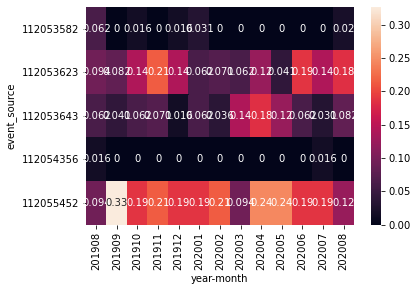

In [24]:
sns.heatmap(pivot_voice_usage_info[year_month_list].head(), annot=True)

In [25]:
pivot_voice_usage_info['Usage_Rating_Scaled'] = pivot_voice_usage_info[year_month_list].sum(axis=1)/len(year_month_list)
pivot_voice_usage_info

year-month,201908,201909,201910,201911,201912,202001,202002,202003,202004,202005,202006,202007,202008,Usage_Rating_Scaled
event_source,,,,,,,,,,,,,,
112053582,0.062500,0.000000,0.015625,0.000000,0.015625,0.031250,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.020408,0.011185
112053623,0.093750,0.081633,0.140625,0.214286,0.140625,0.062500,0.071429,0.062500,0.122449,0.040816,0.187500,0.140625,0.183673,0.118647
112053643,0.062500,0.040816,0.062500,0.071429,0.015625,0.062500,0.035714,0.140625,0.183673,0.122449,0.062500,0.031250,0.081633,0.074863
112054356,0.015625,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.015625,0.000000,0.002404
112055452,0.093750,0.326531,0.187500,0.214286,0.187500,0.187500,0.214286,0.093750,0.244898,0.244898,0.187500,0.187500,0.122449,0.191719
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
912286932,0.000000,0.000000,0.015625,0.000000,0.015625,0.015625,0.000000,0.031250,0.020408,0.000000,0.031250,0.015625,0.020408,0.012755
912286967,0.015625,0.000000,0.031250,0.017857,0.015625,0.000000,0.000000,0.000000,0.000000,0.020408,0.015625,0.015625,0.020408,0.011725
912286996,0.031250,0.040816,0.031250,0.017857,0.015625,0.000000,0.017857,0.015625,0.020408,0.020408,0.000000,0.000000,0.000000,0.016238


### Finding Outliers

array([<AxesSubplot:xlabel='event_source'>,
       <AxesSubplot:xlabel='event_source'>,
       <AxesSubplot:xlabel='event_source'>,
       <AxesSubplot:xlabel='event_source'>,
       <AxesSubplot:xlabel='event_source'>,
       <AxesSubplot:xlabel='event_source'>,
       <AxesSubplot:xlabel='event_source'>,
       <AxesSubplot:xlabel='event_source'>,
       <AxesSubplot:xlabel='event_source'>,
       <AxesSubplot:xlabel='event_source'>,
       <AxesSubplot:xlabel='event_source'>,
       <AxesSubplot:xlabel='event_source'>,
       <AxesSubplot:xlabel='event_source'>,
       <AxesSubplot:xlabel='event_source'>], dtype=object)

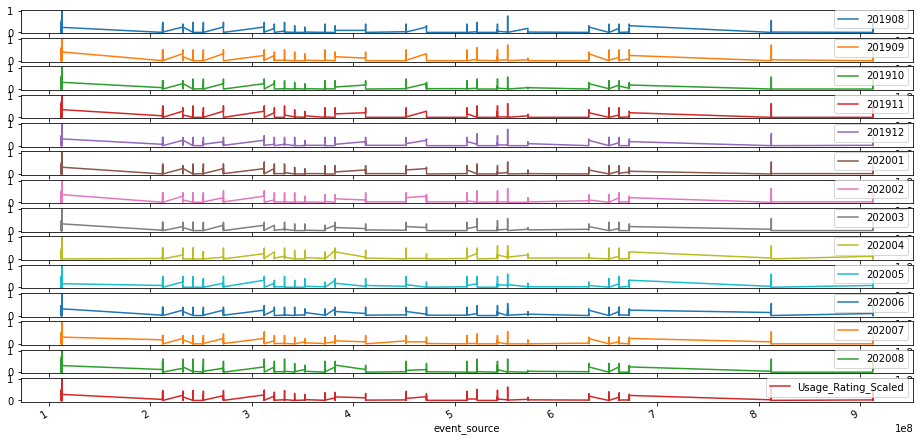

In [26]:
pivot_voice_usage_info.plot.line(subplots=True, figsize=(16,8))

<AxesSubplot:>

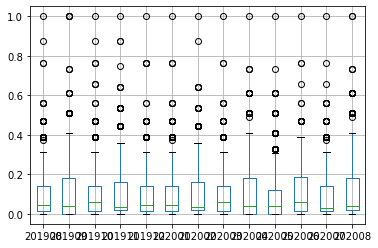

In [27]:
pivot_voice_usage_info.boxplot(column=[201908,201909,201910,201911,201912,202001,202002,202003,202004,202005,202006,202007,202008,])

In [28]:
pivot_voice_usage_info.describe()

year-month,201908,201909,201910,201911,201912,202001,202002,202003,202004,202005,202006,202007,202008,Usage_Rating_Scaled
count,3307.000000,3307.000000,3307.000000,3307.000000,3307.000000,3307.000000,3307.000000,3307.000000,3307.000000,3307.000000,3307.000000,3307.000000,3307.000000,3307.000000
mean,0.089228,0.101529,0.097138,0.096565,0.089531,0.089937,0.091597,0.092824,0.106120,0.086064,0.103667,0.090239,0.106243,0.095437
std,0.107860,0.129516,0.113206,0.118155,0.106134,0.106908,0.115365,0.106590,0.131524,0.113485,0.113178,0.107246,0.131478,0.102268
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.001202
25%,0.015625,0.000000,0.015625,0.017857,0.015625,0.015625,0.017857,0.015625,0.000000,0.000000,0.015625,0.015625,0.020408,0.017624
50%,0.046875,0.040816,0.062500,0.035714,0.046875,0.046875,0.035714,0.062500,0.040816,0.040816,0.062500,0.031250,0.040816,0.056907
75%,0.140625,0.183673,0.140625,0.160714,0.140625,0.140625,0.160714,0.140625,0.183673,0.122449,0.187500,0.140625,0.183673,0.147321
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [29]:
# labling usage bins
bins = [0, 0.08, 0.3,1]
labels = ['LOW','MEDIUM','HIGH']
pivot_voice_usage_info['Usage_Rating_Categorical'] = pd.cut(pivot_voice_usage_info['Usage_Rating_Scaled'], bins=bins, labels=labels)
pivot_voice_usage_info

year-month,201908,201909,201910,201911,201912,202001,202002,202003,202004,202005,202006,202007,202008,Usage_Rating_Scaled,Usage_Rating_Categorical
event_source,,,,,,,,,,,,,,,
112053582,0.062500,0.000000,0.015625,0.000000,0.015625,0.031250,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.020408,0.011185,LOW
112053623,0.093750,0.081633,0.140625,0.214286,0.140625,0.062500,0.071429,0.062500,0.122449,0.040816,0.187500,0.140625,0.183673,0.118647,MEDIUM
112053643,0.062500,0.040816,0.062500,0.071429,0.015625,0.062500,0.035714,0.140625,0.183673,0.122449,0.062500,0.031250,0.081633,0.074863,LOW
112054356,0.015625,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.015625,0.000000,0.002404,LOW
112055452,0.093750,0.326531,0.187500,0.214286,0.187500,0.187500,0.214286,0.093750,0.244898,0.244898,0.187500,0.187500,0.122449,0.191719,MEDIUM
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
912286932,0.000000,0.000000,0.015625,0.000000,0.015625,0.015625,0.000000,0.031250,0.020408,0.000000,0.031250,0.015625,0.020408,0.012755,LOW
912286967,0.015625,0.000000,0.031250,0.017857,0.015625,0.000000,0.000000,0.000000,0.000000,0.020408,0.015625,0.015625,0.020408,0.011725,LOW
912286996,0.031250,0.040816,0.031250,0.017857,0.015625,0.000000,0.017857,0.015625,0.020408,0.020408,0.000000,0.000000,0.000000,0.016238,LOW


In [30]:
# adding category "NO" 
pivot_voice_usage_info['Usage_Rating_Categorical'] = pivot_voice_usage_info['Usage_Rating_Categorical'].cat.add_categories("NO")
pivot_voice_usage_info.loc[pivot_voice_usage_info['Usage_Rating_Scaled'] == 0.0, 'Usage_Rating_Categorical'] = "NO"
pivot_voice_usage_info[(pivot_voice_usage_info['Usage_Rating_Scaled'] == 0.0)]

year-month,201908,201909,201910,201911,201912,202001,202002,202003,202004,202005,202006,202007,202008,Usage_Rating_Scaled,Usage_Rating_Categorical
event_source,,,,,,,,,,,,,,,


### Fina Result: Usage Ratings

In [31]:
pivot_voice_usage_info

year-month,201908,201909,201910,201911,201912,202001,202002,202003,202004,202005,202006,202007,202008,Usage_Rating_Scaled,Usage_Rating_Categorical
event_source,,,,,,,,,,,,,,,
112053582,0.062500,0.000000,0.015625,0.000000,0.015625,0.031250,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.020408,0.011185,LOW
112053623,0.093750,0.081633,0.140625,0.214286,0.140625,0.062500,0.071429,0.062500,0.122449,0.040816,0.187500,0.140625,0.183673,0.118647,MEDIUM
112053643,0.062500,0.040816,0.062500,0.071429,0.015625,0.062500,0.035714,0.140625,0.183673,0.122449,0.062500,0.031250,0.081633,0.074863,LOW
112054356,0.015625,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.015625,0.000000,0.002404,LOW
112055452,0.093750,0.326531,0.187500,0.214286,0.187500,0.187500,0.214286,0.093750,0.244898,0.244898,0.187500,0.187500,0.122449,0.191719,MEDIUM
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
912286932,0.000000,0.000000,0.015625,0.000000,0.015625,0.015625,0.000000,0.031250,0.020408,0.000000,0.031250,0.015625,0.020408,0.012755,LOW
912286967,0.015625,0.000000,0.031250,0.017857,0.015625,0.000000,0.000000,0.000000,0.000000,0.020408,0.015625,0.015625,0.020408,0.011725,LOW
912286996,0.031250,0.040816,0.031250,0.017857,0.015625,0.000000,0.017857,0.015625,0.020408,0.020408,0.000000,0.000000,0.000000,0.016238,LOW


In [32]:
pivot_voice_usage_info.to_csv("data/user_profile/VOICE_ONNET_OUTGOING_Usage_Categorical.csv")

# Phase 2

## Binnig by Location 

- 1. group by location columns
- 2. Bin by location and get counts

In [38]:
# bucketing by location
voice_location_info = voice_usage_info
voice_location_info['Location_Identifier'] = voice_location_info['msan'].astype(str)+ voice_location_info['location_code'].astype(str) +voice_location_info['equp_id'].astype(str) +voice_location_info['equp_index'].astype(str)
voice_location_info

,event_source,call_count,duration,year-month,account_num,rtom_code,location_code,msan,equp_id,equp_index,Location_Identifier
0,112074655,17,6240.0,201912,0033241719,R-KON,WI-NWT-NODE,MSAG5200-ISL,48520,1,MSAG5200-ISLWI-NWT-NODE485201
1,332284364,48,10260.0,202004,0029874823,R-NTB,PC-AGT-NODE,MSAG5200-ISL,48003,1,MSAG5200-ISLPC-AGT-NODE480031
2,112074723,30,6474.0,202005,0033259838,R-KON,IDH-KGW-NODE,MSAG5200-ISL,619449,1,MSAG5200-ISLIDH-KGW-NODE6194491
3,332284364,37,12060.0,202005,0029874823,R-NTB,PC-AGT-NODE,MSAG5200-ISL,48003,1,MSAG5200-ISLPC-AGT-NODE480031
4,332284364,94,24720.0,202006,0029874823,R-NTB,PC-AGT-NODE,MSAG5200-ISL,48003,1,MSAG5200-ISLPC-AGT-NODE480031
...,...,...,...,...,...,...,...,...,...,...,...
32164,382247076,1,393.0,201911,0030285325,R-PH,PH-AKG-NODE,MSAG5200,43163,1,MSAG5200PH-AKG-NODE431631
32165,382247139,6,1070.0,202001,0037371559,R-PH,PH-AKG-NODE,MSAG5200,43163,1,MSAG5200PH-AKG-NODE431631
32166,382247139,14,1695.0,202002,0037371559,R-PH,PH-AKG-NODE,MSAG5200,43163,1,MSAG5200PH-AKG-NODE431631
32167,382247139,4,2340.0,202003,0037371559,R-PH,PH-AKG-NODE,MSAG5200,43163,1,MSAG5200PH-AKG-NODE431631


In [39]:
voice_location_info = voice_location_info.drop_duplicates("event_source", keep="last")
voice_location_info.shape

(3307, 11)

In [40]:
user_location = voice_location_info[['event_source','Location_Identifier']]
user_location

,event_source,Location_Identifier
7,112074723,MSAG5200-ISLIDH-KGW-NODE6194491
35,112074735,MSAG5200-ISLIDH-KGW-NODE6194491
39,112074768,MSAG5200-ISLIDH-KGW-NODE6194491
58,332286609,MSAG5200-ISLPC-AGT-NODE480031
71,522237151,C300MNW-MEE-NODE18887751
...,...,...
32156,242050027,MSAG5200-ISLVA-NKM-NODE481961
32158,112810886,MSAG5200-ISLND-PHG-NODE500241
32159,112768419,MSAG5200-ISLND-PHG-NODE500241
32164,382247076,MSAG5200PH-AKG-NODE431631


In [41]:
user_location.to_csv("data/user_profile/VOICE_ONNET_OUTGOING_Locations_of_Users.csv")

In [35]:
voice_location_info["User_Count"] = 1
voice_gropued_by_locations = voice_location_info.groupby(['Location_Identifier'], axis=0,as_index=False).sum()
voice_gropued_by_locations = voice_gropued_by_locations[['Location_Identifier','User_Count']]

<ipython-input-35-46e54884d952>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  voice_location_info["User_Count"] = 1


In [36]:
voice_gropued_by_locations

,Location_Identifier,User_Count
0,C300MHE-DMD-NODE15221561,12
1,C300MHT-NE-NODE8152461,20
2,C300MIDH-IDJ-NODE11065541,61
3,C300MKI-NODE10668164,87
4,C300MNW-MEE-NODE18887751,183
5,C300MPDT-NODE13379431,12
6,C300MTP-NODE8700911,21
7,C300MVH-NODE9874041,17
8,MA5603TAD-SRV-NODE10224991,7
9,MSAG5200-ISLBZ-NODE435881,157


In [37]:
voice_gropued_by_locations.to_csv("data/user_profile/VOICE_ONNET_OUTGOING_Users_by_location.csv")